In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [437]:
df = pd.read_csv("/home/vamshi/Downloads/tvmarketing.csv")
df.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [438]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [439]:
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [440]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [441]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [442]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [443]:
model.coef_

array([0.0464078])

In [444]:
model.intercept_

np.float64(7.239459830751138)

In [445]:
y_pred

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864,
       10.72468577, 17.30067133,  9.55984994, 17.56055502, 15.36546598,
        8.7013056 ,  9.84757831, 18.12208943,  7.49006196, 13.71334823,
       15.13806775,  7.57823679, 16.40964153, 10.73396733, 18.25667206,
       17.89005042, 10.38590882,  9.00295631, 18.88317738, 10.44159818,
        9.72227724, 17.14752559, 13.70406667, 11.28622018,  7.62928537,
       16.5117387 , 10.45087974, 16.46997167,  8.02375169, 20.26612989,
       18.2937983 ,  9.48095667, 19.94127527, 12.67845424,  8.51567439,
       12.62276488, 15.45364081,  9.2396361 , 10.1306659 , 17.63480751,
        9.01223787, 10.51585066, 14.07532908, 12.09371593, 10.78037513,
       10.86854996, 15.05453371,  7.64320771,  7.60144069, 10.78501591,
       13.24462943, 10.64579251, 20.68380011,  8.14905275, 16.40964153])

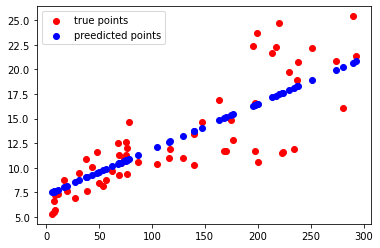

In [446]:
plt.scatter(x_test, y_test, color='red', label="true points")
plt.scatter(x_test, y_pred, color='blue', label='preedicted points')
plt.legend()
plt.show()

In [447]:
x_train = x_train.values
y_train = y_train.values.reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)

(140, 1)
(140, 1)


In [448]:
x_mean, y_mean = np.mean(x_train), np.mean(y_train)


num = np.sum((x_train-x_mean)*(y_train-y_mean))
den = np.sum((x_train-x_mean)**2)

b1 = num/den
b0 = y_mean-(b1*x_mean)

print(f"coefficients are b1 = {b1} & b0 = {b0}")

coefficients are b1 = 0.04640780212815278 & b0 = 7.2394598307511355


In [449]:
x_test = x_test.values
y_test = y_test.values.reshape(-1, 1)
print(x_test.shape)
print(y_test.shape)

(60, 1)
(60, 1)


In [450]:
y_pred

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864,
       10.72468577, 17.30067133,  9.55984994, 17.56055502, 15.36546598,
        8.7013056 ,  9.84757831, 18.12208943,  7.49006196, 13.71334823,
       15.13806775,  7.57823679, 16.40964153, 10.73396733, 18.25667206,
       17.89005042, 10.38590882,  9.00295631, 18.88317738, 10.44159818,
        9.72227724, 17.14752559, 13.70406667, 11.28622018,  7.62928537,
       16.5117387 , 10.45087974, 16.46997167,  8.02375169, 20.26612989,
       18.2937983 ,  9.48095667, 19.94127527, 12.67845424,  8.51567439,
       12.62276488, 15.45364081,  9.2396361 , 10.1306659 , 17.63480751,
        9.01223787, 10.51585066, 14.07532908, 12.09371593, 10.78037513,
       10.86854996, 15.05453371,  7.64320771,  7.60144069, 10.78501591,
       13.24462943, 10.64579251, 20.68380011,  8.14905275, 16.40964153])

In [451]:

y_train_pred = b0+(b1*x_train)
y_train_pred.shape

(140, 1)

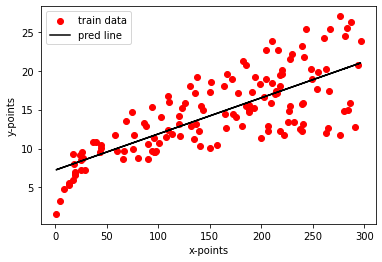

In [452]:

plt.scatter(x_train, y_train, color='red', marker='o', label='train data')
plt.plot(x_train, y_train_pred, color='black', label='pred line')
plt.xlabel('x-points')
plt.ylabel('y-points')
plt.legend()
plt.show()

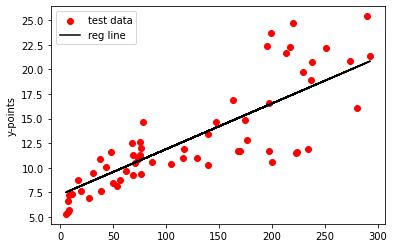

In [453]:
y_test_pred = b0+(b1*x_test)
plt.scatter(x_test, y_test, color='red', label='test data')
plt.plot(x_test, y_test_pred, color='black', label='reg line')
plt.ylabel('y-points')
plt.legend()
plt.show()

In [454]:
mse = mean_squared_error(y_test, y_test_pred)
mse

8.970991242413612

In [455]:
r2_score = r2_score(y_test, y_test_pred)
r2_score

0.6714477229302767

In [456]:
r2_score = 1-(np.sum((y_test-y_test_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
r2_score

np.float64(0.6714477229302767)

In [457]:
n = x_test.shape[0];
k = 1
adjusted_r2 = 1 - (((1 - r2_score) * (n - 1)) / (n - k - 1))
print(adjusted_r2)

0.66578302849804
